# The Most Simple GANs in the Universe

Let's say we want to make a GANs that can generate sinus functions ...

you know these guys

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import math
import torch
from torch import nn

from torch.optim import SGD
# from torch.nn import CosineSimilarity
from torch.nn import L1Loss

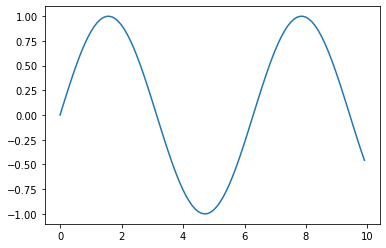

In [15]:
x = np.arange(0, 10, 0.1)
y = [math.sin(elem) for elem in x]
plt.plot(x, y)

## Procedure

* Step 1 is can we make a NN that can actually learn to make a SINUS, this will be the artist or generator

* Step 2 is to make a discriminator that is able to discrimate the two

* Step 3 is to combine the two and train them in tandem using a special loss function

In [16]:
len(x)

100

In [ ]:
out_size = 10

def generator(x=100):
        nn.Linear(100)

        

In [18]:
from torch.utils.data import DataLoader, Dataset

In [90]:
normalize(torch.tensor([1.1,2.2,3.3]), dim=0)

tensor([0.2673, 0.5345, 0.8018])

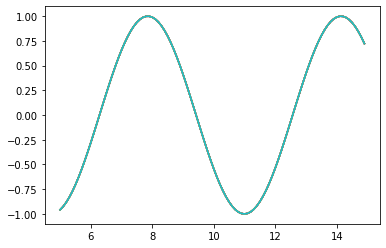

In [150]:
SIN_SIZE = 5

from torch.nn.functional import normalize

class SinDataset(Dataset):
    
    def __init__(self, size=1000):
        self.size = size
        
    def __len__(self):
        return self.size
    
    def __getitem__(self, idx):
        if idx >= self.size:
            raise ValueError("Out of bounds")
            
        x = torch.tensor(np.arange(idx*SIN_SIZE, idx*SIN_SIZE+10, 0), dtype=torch.float32)
        y = torch.tensor([math.sin(elem) for elem in x], dtype=torch.float32)
        
        x_norm = normalize(x, dim=0)
        
        return x, y

ds = SinDataset(100)

for i in range(10):
    x,y = ds[i]
    plt.plot(x, y)

In [151]:
# Model of Generator

model = nn.Sequential(
    nn.Linear(100, 256),
    nn.Linear(256, 256),
    nn.Linear(256, 100)
)

Epoch #0
Epoch Loss = 43.67178916931152
Epoch #1
Epoch Loss = 43.67178916931152
Epoch #2
Epoch Loss = 43.67178916931152
Epoch #3
Epoch Loss = 43.67178916931152
Epoch #4
Epoch Loss = 43.67178916931152
Epoch #5
Epoch Loss = 43.67178916931152
Epoch #6
Epoch Loss = 43.67178916931152
Epoch #7
Epoch Loss = 43.67178916931152
Epoch #8
Epoch Loss = 43.67178916931152
Epoch #9
Epoch Loss = 43.67178916931152


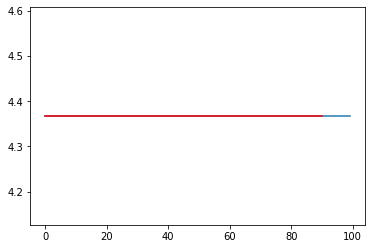

In [152]:
from torch.nn import MSELoss
from torch.optim import Adadelta

num_epochs = 10
# optimizer = Adadelta(model.parameters(), lr=0.0001)

lr = 1e-5
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_fn = MSELoss()

max_size = 10000
dataset = SinDataset(max_size)
loader = DataLoader(dataset, shuffle=True)
train_losses = []

for epoch in range(num_epochs):
    print(f"Epoch #{epoch}")
    epoch_loss = 0
    for i, data in enumerate(loader):
        x, y = data
        
#         print(y_pred, y)

        y_pred = model(x)
        loss = loss_fn(y, y_pred)
        loss.backward() # Backprop
        
        optimizer.zero_grad()
        optimizer.step()
        
#         print(loss.item())
        if i % 1000 == 0:
            loss_val = loss.item()
#             print(loss_val)
            train_losses.append(loss_val)
            epoch_loss += loss_val
        
    print(f"Epoch Loss = {epoch_loss}")
    
    
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

plt.title = "Training Loss"
plt.plot(train_losses)
plt.plot(moving_average(train_losses, 10), c='red')

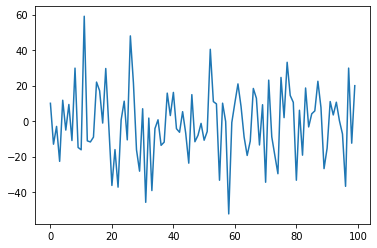

In [136]:
x = np.arange(0, 100, 1)
plt.plot(x, model(torch.Tensor(x)).detach())